In [84]:
! pip install pandas-datareader
! pip install pmdarima

from pandas_datareader import DataReader # pip install pandas-datareader
from pandas_datareader import data
from datetime import datetime
from pmdarima.arima import *

import pandas as pd
import plotly as ply
 
start = pd.to_datetime('2010-01-01') # in YYYY-MM-DD format
end = pd.to_datetime('today')
ts = data.DataReader('NDAQ', 'yahoo', start , end) # here 'yahoo' is the API to yahoo

ModuleNotFoundError: No module named 'plotly'

<AxesSubplot:title={'center':'NDAQ 2010-2021'}, xlabel='Date'>

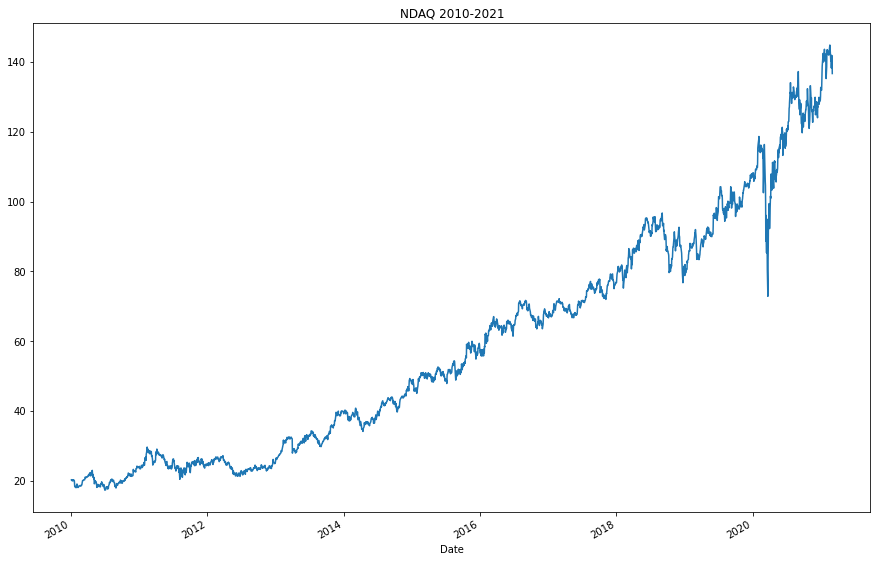

In [6]:
ts.Close.plot(figsize=(15,10), title = "NDAQ 2010-2021")

In [8]:
ts_diff = ts.diff()
ts_diff.Close[0] = 0

<AxesSubplot:title={'center':'NDAQ Diff 2010-2021'}, xlabel='Date'>

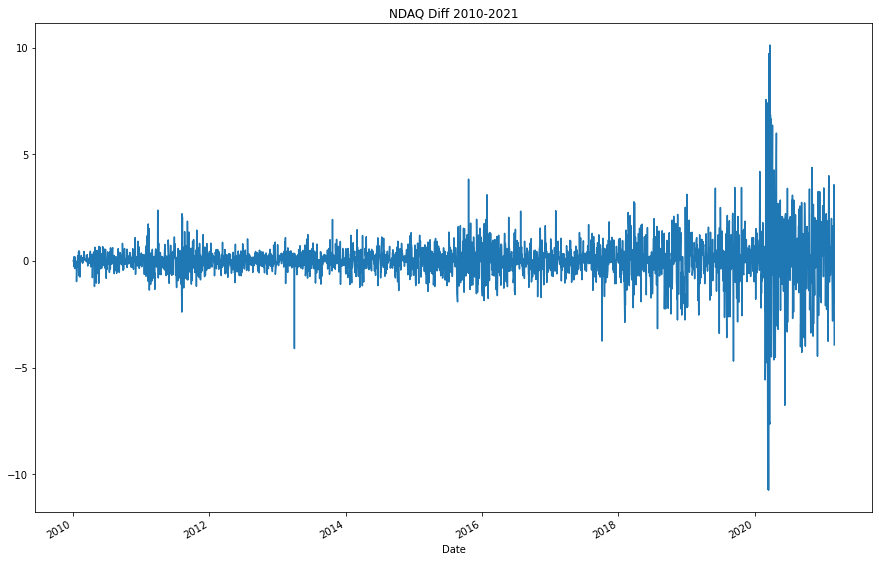

In [9]:
ts_diff.Close.plot(figsize=(15,10), title = "NDAQ Diff 2010-2021")

In [10]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(ts.Close)

(0.37265287174100237, True)

In [12]:
ts_diff

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,NaN,NaN,NaN,0.000000,NaN,NaN
2010-01-05,-0.110001,0.030001,0.010000,0.059999,-689800.0,0.051598
2010-01-06,0.040001,0.230000,0.270000,-0.009998,965000.0,-0.008598
2010-01-07,-0.060001,-0.270000,0.049999,-0.270000,386100.0,-0.232197
2010-01-08,0.000000,-0.010000,-0.219999,0.209999,-1383600.0,0.180599
...,...,...,...,...,...,...
2021-02-25,1.330002,1.759995,2.270004,-1.669998,37200.0,-1.669998
2021-02-26,-2.570007,-2.379990,-1.630005,-2.030014,293300.0,-2.030014
2021-03-01,1.870010,1.599991,-0.770004,3.580002,-243900.0,3.580002


In [18]:
stepwise_model = auto_arima(ts.Close, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=10.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10381.703, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=9553.337, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=5.82 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10374.880, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9083.850, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=13.54 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=10.18 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9091.134, Time=0.92 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9073.648, Time=1.36 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=9532.156, Time=0.76 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=22.12 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=13.58 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9060.576, Time=1.54 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC

In [88]:
train = ts.Close.loc['2010-01-01':'2021-02-23']
test7 = ts.Close.loc['2021-02-23':]
test31 = ts.Close.loc['2021-01-19':]

In [90]:
stepwise_model.fit(train)

ARIMA(order=(3, 1, 3), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [89]:
print (test7.size)
print (test31.size)
print (train.size)

7
31
2804


In [91]:
future_forecast = stepwise_model.predict(n_periods=7)

In [92]:
print(future_forecast)

[141.71436667 141.19518734 141.81742609 143.78376082 143.88655428
 144.10371203 144.51017028]


<AxesSubplot:xlabel='Date'>

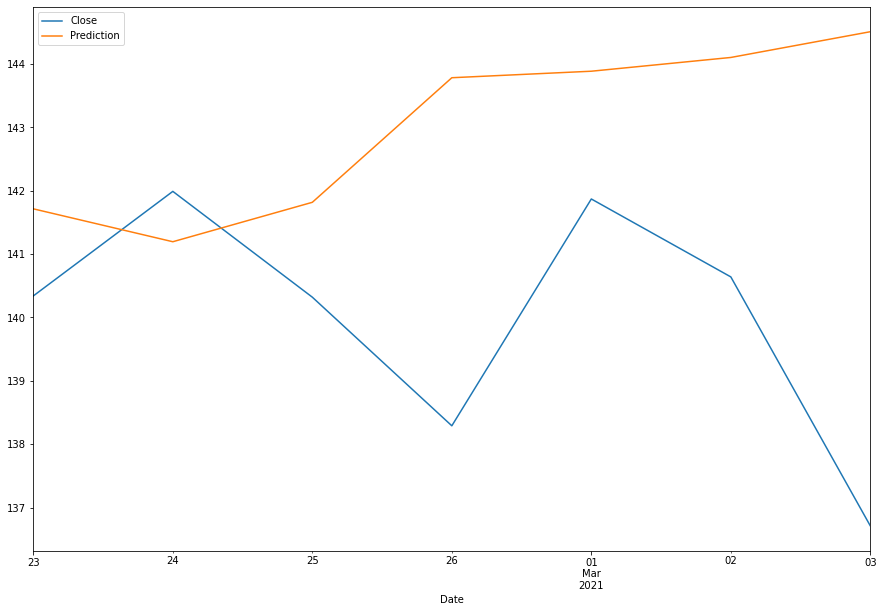

In [95]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])

pd.concat([test7,future_forecast],axis=1).plot(figsize = (15,10))

<AxesSubplot:xlabel='Date'>

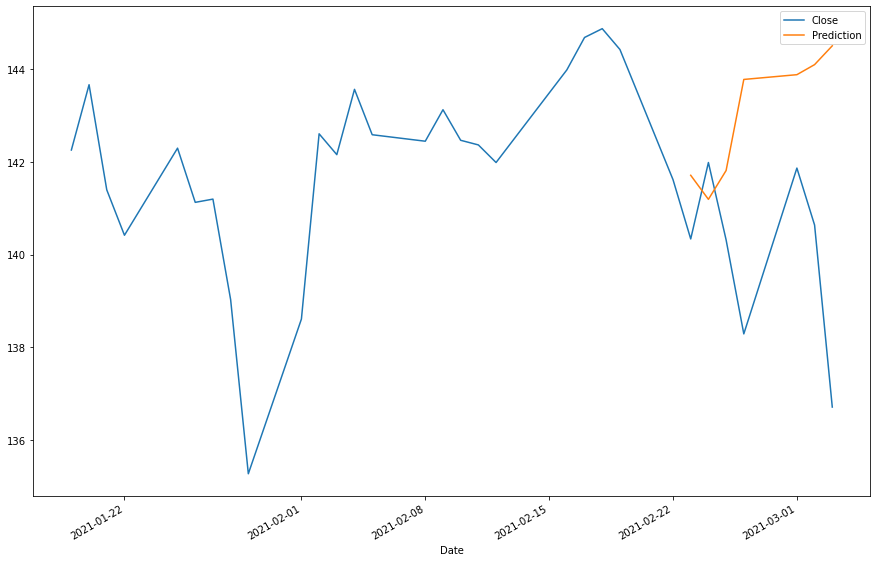

In [96]:
pd.concat([test31,future_forecast],axis=1).plot(figsize = (15,10))